In [1]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
#from install import *
#install_requirements(is_chapter6=True)

fatal: destination path 'notebooks' already exists and is not an empty directory.
/content/notebooks


In [2]:
#%%capture
!pip install transformers==4.41.2
!pip install datasets==2.20.0

!pip install pyarrow==16.0
!pip install requests==2.32.3

!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0

!pip install importlib-metadata

!pip install accelerate -U


# file specific
!pip install sacrebleu
!pip install rouge_score

  Using cached pyarrow-16.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.0.0 which is incompatible.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1

In [3]:
from utils import *
setup_chapter()

Using transformers v4.41.2
Using datasets v2.20.0


In [4]:
#%%capture
# Verifying packages installed are now up to date
!pip show pyarrow requests transformers datasets torch torchaudio importlib-metadata

Name: pyarrow
Version: 16.0.0
Summary: Python library for Apache Arrow
Home-page: https://arrow.apache.org/
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: bigframes, cudf-cu12, datasets, db-dtypes, ibis-framework, pandas-gbq, tensorflow-datasets
---
Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, huggingface-hub, kaggle, kagglehub, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, torchtext, tr

In [5]:
!nvidia-smi

Mon Jul  1 16:53:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   32C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 7
microcode	: 0xffffffff
cpu MHz		: 2200.230
cache size	: 39424 KB
physical id	: 0
siblings	: 12
core id		: 0
cpu cores	: 6
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp ibrs_enhanced fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat avx512_vnni md_clear arch_capabilities
bugs		: spectre_v1 spectre_v2 spec_store_bypass swapgs ta

In [ ]:
import torch
import transformers
import datasets
import tokenizers

print("PyTorch Version:" + torch.__version__)
print("Transformers Version:" + transformers.__version__)
print("Datasets Version:" + datasets.__version__)
print("Tokenizers Version:" + tokenizers.__version__)

In [ ]:
# for TPU

#import torch_xla
#import torch_xla.core.xla_model as xm

#device = xm.xla_device()
#print(device)

### Notes

**Reclarification for mental image**

- queries in decoder are generated based on input alone. It is generated in the masked self attention layer (which is also responsible for masking the future tokens by setting them to -100)
- in encoder-decoder. keys and values comes from the encoder
- in decoder only, self-attention mechanism of decoder layers generates Q, K, V based on inputs (kind of simillar to how attention head of encoder works)
  - interestingly there is no cross-attention in decoder only transformer, since there's no separate encoder to attend to.
  - But yes, the dot product between Q and K (simillar to dot product calculation in encoder-decoder architecture) occurs as well, before the scores are passed to softmax normalisation.
- Q, K, V in whether encoder or decoders are all generated from separate linear matrix transformations. Basically how NN works in general

Conclusion
- Encoder and decoder are actually very, very simillar. With how it basically just initialises Q, K, V based on inputs, and then applies linear transformation. Only slight difference is how encoder are bi-directional, allowing it to pay attention to inputs in future and in past and vice versa. Furthermore, they have vastly different outputs, etc.

For more detail: https://chatgpt.com/c/08ebc76d-4955-4b7f-96fa-6652e9779c6e

### Back to Code

In [ ]:
from transformers import pipeline, set_seed

# Summarisation - The CNN/DailyMail Dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("abisee/cnn_dailymail", "3.0.0")
print(f"Features: {dataset['train'].column_names}")

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Features: ['article', 'highlights', 'id']


In [ ]:
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [ ]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 4051):

Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events. Here,
Soledad O'Brien takes users inside a jail where many of the inmates are mentally
ill. An inmate housed on the "forgotten floor," where many mentally ill inmates
are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the
Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here,
inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


Text Summarisation Pipelines

In [ ]:
sample_text = dataset["train"][1]["article"][:2000]
# We'll collect the generated summaries of each model in a dictionary
summaries = {}

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

Summarisation Baseline

In [ ]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [ ]:
# GPT-2
from transformers import pipeline, set_seed

set_seed(42)
pipe = pipeline("text-generation", model="gpt2-xl")
gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# T5
pipe = pipeline("summarization", model="t5-large")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
# BART
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# PEGASUS
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Comparing Different Summaries

In [ ]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .

BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their
experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are
mentally ill. An inmate housed on the "forgotten floor," where many mentally ill
inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention
facility is dubbed the "forgotten floor."

GPT2
To get to the jail, you go up a flight of stairs, pass a metal detector, and go
down a hall.
The inmates are so scared that they'll be thrown in jail for not turning up your
appointment.
The first room to the right is 

# Measuring the Quality of Generated Text

# BLEU metric

In [ ]:
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

<ipython-input-23-eacc06f6d0e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


The repository for sacrebleu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sacrebleu.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


## BLEU notes

Note: BLEU is actually geometric. Hence, if any 0 appears across 1-grams to 4-grams. The metric score will instantly be 0!

The limitation of BLEU mentioned in terms of expecting text to be tokenized refers to the requirement that both the reference text and the candidate (translated) text be broken down into manageable, discrete units called tokens (words or subwords) before evaluation. Here's a breakdown of what this implies and why it's considered a limitation:

### What is Tokenization?

Tokenization is the process of splitting text into tokens, which can be words, subwords, or even characters. This step is crucial because BLEU evaluates translations based on the presence and correctness of these tokens, especially in sequences or n-grams (contiguous sequences of n tokens).

### Why Tokenization is a Limitation:

1. **Language Dependency**: The effectiveness of tokenization can vary significantly between languages. For languages with clear whitespace delimiters between words (like English), tokenization is straightforward. However, in languages without clear word boundaries, such as Chinese or Thai, tokenization becomes a complex process that requires sophisticated algorithms to correctly identify token boundaries.

2. **Consistency Requirement**: Both the reference and candidate texts must be tokenized in the same way. Any inconsistency in tokenization can lead to unfair or inaccurate BLEU scores because the n-grams formed will differ, affecting the precision calculations.

3. **Sensitivity to Tokenization Method**: BLEU's performance and accuracy can heavily depend on the method of tokenization used. For example, different tokenizers might split contractions differently (e.g., "don't" could be tokenized as ["don", "t"] or ["don't"]) or handle punctuation differently. These variations can lead to significant differences in BLEU scores.

4. **Granularity Issues**: The choice of granularity in tokenization (e.g., word-level vs. subword-level) can affect the BLEU score. Subword tokenization, which is often used for languages with rich morphology or for handling rare words, might result in higher BLEU scores due to a more fine-grained matching of tokens that would not be recognized at the word level.

### Impact on BLEU Score Evaluation:

The requirement for tokenization implies that BLEU, as a metric, might not fully capture the quality of a translation if the tokenization is not handled correctly. For instance, if a translation perfectly captures the meaning and intent of the source text but uses a syntactic structure or vocabulary that leads to different tokenization, BLEU might undervalue this translation due to mismatches in the expected n-grams.

In summary, the dependency on tokenization is a significant limitation of the BLEU metric because it adds an extra layer of complexity and a potential source of error in evaluating translations, especially across languages with different linguistic structures. This can ultimately affect the reliability and universality of BLEU as a standard metric for translation quality assessment.

From the book excerpt you've shared, there are two formulas for \( P_n \), which represent precision calculations for n-grams in the context of evaluating the quality of generated text like translations. Here’s a breakdown of each formula and how they work:

### Formula 1: Basic Precision for n-grams
$$ P_n = \frac{\sum_{\text{n-gram} \in \text{snt}} \text{Count}_{\text{clip}}(\text{n-gram})}{\sum_{\text{n-gram} \in \text{snt}} \text{Count}(\text{n-gram})} $$

**Explanation**:
- **Numerator**: The sum of clipped counts of each n-gram that appears in the candidate sentence (`snt`). "Clipped" means that if an n-gram appears more times in the candidate sentence than in the reference, its count is clipped to the maximum number it appears in the reference. This prevents overestimating the precision for overly repeated n-grams.
- **Denominator**: The sum of all n-grams in the candidate sentence.

**Example**:
- **Reference Sentence**: "The quick brown fox jumps over the lazy dog."
- **Candidate Sentence**: "The quick fox jumps over the quick dog."
- **n-gram (bigram) Analysis**: Let's consider bigrams (n=2).
  - Count in candidate ("the quick") = 2, but in reference, it appears once, so clip to 1.
  - Total bigrams in candidate: 7
  - Clipped count would be summed for each bigram similarly.

**Result**: Precision would be calculated by taking the ratio of clipped counts of all bigrams in the candidate to the total bigrams in the candidate.

### Formula 2: Adjusted Precision Across Multiple References (or multiple sentences)
$$ P_n = \frac{\sum_{snt \in C} \sum_{\text{n-gram} \in snt} \text{Count}_{\text{clip}}(\text{n-gram})}{\sum_{snt \in C} \sum_{\text{n-gram} \in snt} \text{Count}(\text{n-gram})} $$

**Explanation**:
- **Numerator**: This is similar to the first formula, but the calculation is extended over all sentences in a corpus \( C \) (i.e., a set of multiple sentences, which could be multiple references or a longer document).
- **Denominator**: The total count of all n-grams across all sentences in the corpus \( C \).

**Example**:
- **Reference Corpus**: ["The quick brown fox", "jumps over the lazy dog"]
- **Candidate Corpus**: ["The quick fox", "jumps over the quick dog"]
- Each sentence is analyzed separately like in the first example, but sums are taken over all sentences in the corpus.

**Result**: Precision is calculated by summing the clipped counts of all n-grams in all sentences and dividing by the total n-grams across all sentences in the candidate corpus.

### Key Difference:
The key difference between these two formulas lies in their scope of application:
- **Formula 1** is for a single sentence or a very specific scope.
- **Formula 2** extends this calculation to a broader corpus, making it more suitable for evaluations involving multiple sentences or documents.

This adjustment is crucial for evaluating texts with multiple sentences where context and continuity matter, allowing for a more comprehensive assessment of translation or text generation quality.

In the context of the BLEU score calculation, especially when using libraries like HuggingFace's `datasets` for calculating the BLEU metric, the parameters `smooth_method` and `smooth_value` are important adjustments used to handle edge cases where there might be zero counts for some n-gram matches. These parameters help in stabilizing the metric computation by avoiding zero precision scores that could severely affect the final BLEU score. Let's delve into each one:

### Smooth Method

The `smooth_method` parameter specifies the technique used to smooth the n-gram precisions. Smoothing is crucial because strict zero counts for any n-gram precision can lead to a zero overall BLEU score due to the multiplicative nature of the geometric mean used in its calculation. Here are common smoothing techniques:

1. **Additive (or Laplace) Smoothing**: Small constants are added to the numerator and denominator of the n-gram precision calculation. This is akin to adding a small count to all n-grams, ensuring that none have a zero count.

2. **Modified Smoothing**: More sophisticated methods that adjust counts based on different criteria. This can include adjusted fractions for n-gram matches based on their frequency or order.

The choice of method depends on the library and the specifics of the implementation. For instance, in NLTK's implementation of BLEU, a method often used is smoothing by adding 1 to the numerators and denominators (a variant of additive smoothing).

### Smooth Value

The `smooth_value` parameter is typically used in conjunction with a smoothing method to define the magnitude of the adjustment. For example:

- In additive smoothing, `smooth_value` could be a small constant (e.g., 0.1) added to all n-gram precision calculations.
- In other methods, `smooth_value` might control the extent or method of smoothing more directly, influencing how the adjustments are calculated across different n-gram levels.

### Practical Use

These parameters are used in the function call for calculating BLEU like this (using hypothetical function parameters):

```python
from datasets import load_metric

bleu = load_metric("bleu")
results = bleu.compute(predictions=predicted_sentences, references=reference_sentences, smooth_method='floor', smooth_value=0.1)
```

In this example:
- `smooth_method='floor'` might refer to a specific type of smoothing where a floor value is set to prevent any precision scores from being zero.
- `smooth_value=0.1` indicates the value used in the smoothing process, ensuring that no n-gram precision is zero by effectively adjusting the scores.

### Conclusion

Smoothing in the calculation of the BLEU score is crucial for handling cases where the raw precision scores might include zeros, particularly in datasets with diverse linguistic features or where the candidate translation might miss certain n-grams entirely. By applying smoothing, the BLEU score becomes a more reliable and less volatile measure of translation quality across a wider array of texts.

## back to code

In [ ]:
bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,57.893007
counts,"[5, 3, 2, 1]"
totals,"[5, 4, 3, 2]"
precisions,"[100.0, 75.0, 66.67, 50.0]"
bp,0.818731
sys_len,5
ref_len,6


# ROGUE metric

## ROGUE notes

The **ROUGE** (Recall-Oriented Understudy for Gisting Evaluation) metric, commonly spelled as ROUGE but you've referred to it as "ROGUE," is used primarily for evaluating automatic summarization of texts as well as machine translation. It includes several variants, such as ROUGE-N, ROUGE-L, ROUGE-W, etc., each of which serves different purposes but all fundamentally rely on comparing the overlap between the system-generated text and a set of reference texts.

### General Principle

At its core, ROUGE measures the overlap of n-grams between the generated text and the reference texts. It focuses on two key aspects:

1. **Recall**: The proportion of n-grams in the reference that are also found in the generated text.
2. **Precision**: The proportion of n-grams in the generated text that are also found in the reference.

The combination of these aspects helps to evaluate both the completeness and conciseness of the generated text relative to the reference.

### ROUGE-N: Count Match

For ROUGE-N (where 'N' stands for the length of the n-gram), the **Count_match** function calculates how many n-grams in the generated text match the n-grams in the reference text. Here's how it typically works:

1. **N-gram Generation**: First, the text (both generated and reference) is broken down into n-grams. For example, in ROUGE-2, the text would be divided into bigrams (sequences of two words).

2. **Count Occurrences**: Count how many times each n-gram appears in both the generated text and the reference texts.

3. **Matching N-grams**: For each n-gram in the generated text, check if it appears in the reference text. The count of these matches is usually done in one of two ways:
   - **Unigram Matching (ROUGE-1)**: Count each instance of unigrams (single words) that appear in both the generated and the reference texts.
   - **Higher-order N-gram Matching (ROUGE-N)**: For n-grams where n > 1, count the instances where sequences of n words match exactly between the generated and the reference texts.

4. **Clipping (Optional)**: Often, a clipping step is included to prevent the system from getting undue credit for repeating the same n-gram. Clipping means that the match count for any n-gram cannot exceed its count in the reference text. This is similar to the "clipping" in BLEU's precision calculation.

### Example

Suppose we have:
- **Reference Text**: "The cat chased the mouse."
- **Generated Text**: "The cat chased a mouse."

For ROUGE-2:
- **Reference Bigrams**: ['The cat', 'cat chased', 'chased the', 'the mouse']
- **Generated Bigrams**: ['The cat', 'cat chased', 'chased a', 'a mouse']

**Count_match** would find matches for 'The cat' and 'cat chased':
- Matches: 2 (out of 4 possible in the reference)
- If clipping is applied, since both bigrams appear once in each text, the count remains unclipped.

### Metrics

Using **Count_match**, ROUGE calculates:
- **Recall (R)**: $$\frac{\text{Number of matching n-grams in the generated and reference}}{\text{Total number of n-grams in the reference}}$$
- **Precision (P)**: $$\frac{\text{Number of matching n-grams in the generated and reference}}{\text{Total number of n-grams in the generated}}$$

ROUGE-N's effectiveness depends on this basic operation, allowing for the assessment of how much key information the generated text captures from the reference, as well as how much of the generated content is relevant or extraneous relative to the reference.

Query: i thought count_clipping and count_match is the difference between ROGUE and BLEU?


---
You are right in noting that the methods of handling n-gram matches—particularly the concepts of count clipping and count matching—highlight fundamental differences between the ROUGE and BLEU metrics. These differences stem from their respective focuses and methodologies. Let's clarify how these concepts apply to each metric and how they distinguish ROUGE from BLEU.

### BLEU Metric

**Count Clipping in BLEU**:
- **Purpose**: To prevent a candidate translation from getting too much credit for repeating the same n-gram.
- **Mechanism**: In BLEU, if an n-gram in the candidate translation appears more times than it does in any single reference translation, its count is "clipped" to the maximum number found in the reference. This is intended to penalize over-repetition and encourage a more natural usage of language.
- **Example**: If the n-gram "the cat" appears 5 times in the candidate but only 2 times in the reference, the count for "the cat" is clipped to 2 for the purpose of calculating precision.

### ROUGE Metric

**Count Match in ROUGE**:
- **Purpose**: To evaluate the quality of summaries or translations based on how much of the reference content is captured by the candidate text.
- **Mechanism**: In ROUGE, "count match" refers to counting the number of times each n-gram from the candidate matches with the n-grams in the reference, without exceeding the number of times those n-grams appear in the reference (similar to BLEU's clipping but more directly focused on recall).
- **Focus**: ROUGE places a strong emphasis on recall—how many of the reference n-grams the candidate captures. This is particularly important in tasks like summarization where covering key information from the reference is critical.

### Key Differences Highlighted

1. **Focus on Recall vs. Precision**:
   - **ROUGE**: Primarily concerned with recall, which is the proportion of the reference n-grams that appear in the candidate text. This makes it particularly suitable for summarization evaluation, where it is crucial to capture all relevant information from the original text.
   - **BLEU**: Focuses more on precision but in a manner influenced by recall. It measures how many of the candidate's n-grams match those in the reference texts and uses geometric averaging and a brevity penalty to balance fluency and adequacy.

2. **Application Context**:
   - **ROUGE**: More flexible in terms of reference texts, often used in summarization tasks where multiple correct answers are possible, and a comprehensive coverage of content is desired.
   - **BLEU**: Commonly used in translation where the precision of specific wording and order is more critical.

3. **Methodological Execution**:
   - **ROUGE**: Often uses multiple variants (ROUGE-N, ROUGE-L for longest common subsequence, ROUGE-W for weighted longest common subsequence) to capture different dimensions of similarity.
   - **BLEU**: Uses a fixed formula with modifications mainly around the clipping and brevity penalty to ensure a balanced evaluation.

In summary, while both metrics use similar concepts like n-gram matching and clipping, their application, focus, and impact on the final score calculation are tailored to different needs—summarization for ROUGE with a recall emphasis, and translation for BLEU with a precision (tempered by recall) emphasis. These differences make each metric uniquely suited to specific types of language processing evaluations.

The equations you're looking at are related to the ROUGE-L metric, which stands for "Recall-Oriented Understudy for Gisting Evaluation using Longest Common Subsequence (LCS)." This metric evaluates the quality of text summaries by measuring the longest common subsequence between the reference text and the generated text. Unlike n-grams that need exact matches and are sensitive to word order, the LCS approach focuses on sequences that appear in both texts without necessarily being contiguous, providing a measure that is more flexible to variations in phrasing and structure.

### Understanding the Equations

From your image, the following three equations are presented:

1. **Recall LCS (RLCS)**:
   $$
   R_{LCS} = \frac{LCS(X, Y)}{m}
   $$
   Here, \( LCS(X, Y) \) is the length of the longest common subsequence between the reference sequence \( X \) and the generated sequence \( Y \). The variable \( m \) is the total number of elements (e.g., words) in the reference sequence \( X \). This equation measures how much of the reference content is captured in the generated text, hence a "recall".

2. **Precision LCS (PLCS)**:
   $$
   P_{LCS} = \frac{LCS(X, Y)}{n}
   $$
   In this equation, \( n \) is the total number of elements in the generated sequence \( Y \). It assesses how much of the generated content is relevant (i.e., appears in the reference), reflecting "precision".

3. **F-score LCS (FLCS)**:
   $$
   F_{LCS} = \frac{(1 + \beta^2) \times R_{LCS} \times P_{LCS}}{(\beta^2 \times P_{LCS}) + R_{LCS}}
   $$
   This is the weighted harmonic mean of precision and recall, providing a single score that balances both. \( \beta \) is a weighting factor which adjusts the emphasis between precision and recall. Typically \( \beta \) is set such that recall is considered more important than precision (e.g., \( \beta = 1 \) balances them equally, while \( \beta > 1 \) makes recall more significant).

### Explanation of the Third Equation (F-score LCS)

The third equation, the F-score for LCS, is a formula that combines both the recall and precision of the longest common subsequence into a single score. This is similar in concept to the traditional F1-score used in classification tasks, which also balances precision and recall but does so for binary or categorical data classifications.

- **What \( \beta^2 \) does**: This term adjusts the importance of precision vs. recall. A higher \( \beta \) values increase the importance of recall relative to precision.
  
- **Numerator**: The product of recall and precision is scaled up by \( 1 + \beta^2 \), emphasizing the balance and contribution of each.
  
- **Denominator**: This adjusts the weighting between recall and precision, ensuring that the emphasis configured by \( \beta \) is correctly applied.

### Practical Example

Imagine you have a reference text "The quick brown fox jumps over the lazy dog" and a generated text "The fox jumped over the dog":
- **LCS**: "The fox over the dog" (length = 5)
- **m (length of reference)**: 9
- **n (length of generated)**: 6
- **Recall LCS**: \( \frac{5}{9} \)
- **Precision LCS**: \( \frac{5}{6} \)

For \( \beta = 1 \) (balancing precision and recall):
- **F-score LCS** would be calculated as \( \frac{2 \times (\frac{5}{9}) \times (\frac{5}{6})}{1 \times (\frac{5}{6}) + (\frac{5}{9})} \).

This formula provides a robust metric for evaluating summaries and translations by acknowledging the importance of both including relevant content (precision) and adequately covering the reference (recall).

## back to code

In [ ]:
rouge_metric = load_metric("rouge")

The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.365079,0.145161,0.206349,0.285714
gpt2,0.271186,0.051724,0.152542,0.271186
t5,0.382979,0.130435,0.255319,0.382979
bart,0.475248,0.222222,0.316832,0.415842
pegasus,0.323232,0.206186,0.282828,0.323232


# Evaluating PEGASUS on the CNN/DailyMail Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import pipeline, set_seed

#set_seed(42)

dataset = load_dataset("abisee/cnn_dailymail", "3.0.0")
rouge_metric = load_metric("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

In [ ]:
# Implementing evaluation function here for baseline summary method (basically just taking in first 3 sentences as summary)
def evaluate_summaries_baseline(dataset, metric,
                                column_text="article",
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])
    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000)) # accessses test split, then shuffles based on set seed // then access first 1000 entries from shuffled dataset split

score = evaluate_summaries_baseline(test_sampled, rouge_metric) # invoking baseline summary function previously defined // rogue_metric is passed in as metric used to evaluate
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) # The mid.fmeasure likely refers to the F-measure (harmonic mean of precision and recall) at a certain confidence interval's midpoint.
                                                                      # rn, XX in dict() means that rn will be key
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T # The orient="index" parameter treats keys of the dictionary as row labels

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.389276,0.171296,0.245061,0.354239


## Notes

Query: why .mid though. i thought that only 1 rogue score is being calculated. why is there a need for mid

---
The use of `.mid` in the context of ROUGE scores typically refers to accessing a specific value from a confidence interval around the ROUGE score. This method is not just about calculating a single ROUGE score but involves statistical methods to provide a more robust measure that includes uncertainty or variability in the score.

### Understanding Confidence Intervals in ROUGE Scores

When evaluating text summarization with ROUGE scores, it's common to compute not only the point estimate of the F-measure but also a confidence interval (CI) around this estimate. The confidence interval provides a range of values which is believed to contain the true ROUGE score with a certain probability (commonly 95%). This statistical approach acknowledges that the computed score may vary due to different factors like sample variability or inherent stochasticity in the data or model behavior.

### Why Use `.mid`?

1. **Midpoint of Confidence Interval**:
   - The `.mid` attribute typically refers to the midpoint of the confidence interval around the F-measure. This midpoint is a representative value that balances between the upper and lower bounds of the interval.
   - It provides a single, stable value that can be used for reporting or comparison, especially in cases where a simple point estimate might be misleading due to high variance in the results.

2. **Statistical Robustness**:
   - Using the midpoint of a confidence interval rather than just a raw score allows for more robust statistical reporting. It considers the uncertainty and variability of the measurement, which is particularly important in tasks like text summarization where the outcome can be highly dependent on the specific contents of the test set.

3. **Comparison Across Studies or Models**:
   - When comparing different models or replicating studies, using the midpoint of the confidence interval can provide a more consistent basis for comparison, as it smooths out potential extremes that might occur due to particularities of a specific dataset or run.

### Practical Example

If you are calculating ROUGE scores and each score comes with a confidence interval, accessing `.mid` allows you to report a more statistically grounded number. For example, if the 95% CI of a ROUGE-1 score ranges from 0.45 to 0.55, then `.mid` might return 0.50, which is the middle of this interval.

### Conclusion

Thus, when you see `.mid` used in the context of ROUGE scores in evaluation scripts or research papers, it indicates an approach that seeks to incorporate statistical reasoning into the evaluation metrics. This helps in making the reported results more reliable and comparable across different experiments, acknowledging the inherent uncertainties in model evaluation.

Query:

how does this work


    for article_batch, target_batch in tqdm(zip(article_batches, target_batches), total=len(article_batches)):

and what is length_penalty=0.8, which part of ROGUE or BLEU is this

---
The code snippet you're referring to combines several Python and machine learning techniques. Let's break it down for better understanding.

### Understanding the Code

```python
for article_batch, target_batch in tqdm(zip(article_batches, target_batches), total=len(article_batches)):
```

This line is a part of a loop that iteratively processes batches of articles and their corresponding target summaries. Here's what each component does:

1. **`zip(article_batches, target_batches)`**:
   - The `zip()` function takes two lists (or iterables) and returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences. Here, `article_batches` is presumably a list of lists (batches) of articles, and `target_batches` is a list of lists (batches) of corresponding target summaries.
   - Each iteration of the loop retrieves one batch of articles and one batch of target summaries, pairing them for processing.

2. **`tqdm(..., total=len(article_batches))`**:
   - `tqdm` is a popular Python library used to display progress bars for loops. It wraps around any iterable, in this case, the result of `zip()`.
   - The `total` parameter is set to the length of `article_batches`, which `tqdm` uses to know the total number of iterations (batches) it needs to process, thus allowing it to calculate the percentage completion and estimated time remaining accurately.

### Usage Context

This construct is typically used in data processing and machine learning contexts where:
   - You have a large dataset divided into batches.
   - You need to process each batch sequentially (e.g., for training a machine learning model).
   - You want to visually monitor the progress of processing.

### About `length_penalty=0.8`

The `length_penalty` parameter you mentioned is not related to ROUGE or BLEU directly. It's typically used in the context of machine learning models that generate text, such as sequence-to-sequence models used in tasks like summarization or translation.

**Length Penalty in Text Generation**:
- **Context**: In text generation, particularly with models like Transformers used in summarization, the `length_penalty` parameter is used during the beam search process to adjust the score of candidate sequences based on their length.
- **Functionality**: A `length_penalty` less than 1.0 encourages shorter sequences, while a penalty greater than 1.0 encourages longer sequences. A value of 0.8 means the model is slightly biased towards generating shorter sequences.
- **Calculation**: During beam search, the scores of candidate sequences are usually normalized by dividing by some power of their lengths (often `length_penalty`). This normalization helps balance the likelihood of longer sequences inherently getting lower scores because they are the product of more probabilities multiplied together.

**Conclusion**:
- This penalty helps control the length of the output to match the expected length distribution of the summaries or translations being generated, potentially improving relevance or conciseness based on the task requirements.

Overall, the loop and `length_penalty` represent techniques to efficiently process and generate text data in a controlled and monitored manner, crucial for applications in natural language processing and machine learning.

## back to code

In [17]:
# Here, implementing same evaluation function for PEGASUS model

from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
  # This function is used to divide a large list into smaller batches of a specified size. It’s a generator function that yields slices of the list, making it memory efficient.
    """Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size): # range() parameters --> range(start, stop, steps)
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))    # Batch Creation: The articles (inputs) and their corresponding target summaries (references) are batched using the chunks function.
    target_batches = list(chunks(dataset[column_summary], batch_size))  # Batch Creation: The articles (inputs) and their corresponding target summaries (references) are batched using the chunks function.

    for article_batch, target_batch in tqdm(zip(article_batches, target_batches), total=len(article_batches)):
    # for each batch of articles and their corresponding reference summaries

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,padding="max_length", return_tensors="pt") # tokenise, applies padding, and truncates to maximum length

        summaries = model.generate( # model generates summary
                         input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8,
                         num_beams=8,
                         max_length=128)

        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, clean_up_tokenization_spaces=True) for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries] # clean up generated text by removing any residual newline characters
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    score = metric.compute()
    return score

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 125/125 [08:06<00:00,  3.89s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.434759,0.216742,0.312271,0.374631


In [ ]:
pd.DataFrame(rouge_dict, index=["pegasus"])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.434759,0.216742,0.312271,0.374631


# Training a Summarization Model

In [8]:
# for SAMsun dataset
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.0 MB/s eta 0:00:00


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


In [10]:
print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


In [13]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import pipeline

device = "cuda" if torch.cuda.is_available() else "cpu"

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")


pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

Summary:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [20]:
rouge_metric = load_metric("rouge")

score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=8)

100%|██████████| 103/103 [13:41<00:00,  7.98s/it]


In [21]:
rouge_metric = load_metric("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.296203,0.087699,0.229514,0.229333


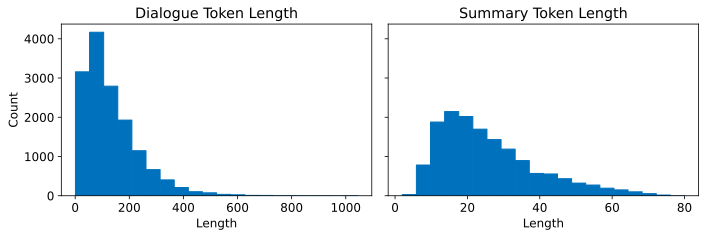

In [23]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0") # bins=20 tells chart to display 20 bars
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [24]:
def convert_examples_to_features(example_batch):
    # setting input_encodings max length to 1024 based on histogram
    # setting target_encodings max length to 128 based on histogram, as can see at most only reach token length of 80 in label

    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024, truncation=True) # tokenised

    # target here is synonym of features/labels
    with tokenizer.as_target_tokenizer(): # as_target_tokenizer() context manager is used to specify that the tokenization settings might
                                          # differ slightly for target texts, typically used in seq2seq tasks. // basically certain seq2seq models have different tokenizers for
                                          # inputs (example_batch["dialogus"]) and labels (example_batch["summary"])
                                                      # with statement is called a context manager!
                                          # TLDR, reason for this is to handle special tokens, or translation or vocabulary differences in multilingual models // refer to notes below
        target_encodings = tokenizer(example_batch["summary"], max_length=128, truncation=True)

    return {"input_ids": input_encodings["input_ids"], "attention_mask": input_encodings["attention_mask"], "labels": target_encodings["input_ids"]}

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True) # mapping, and default batch used here, or batch_size=1000
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns) # The dataset is then formatted to be compatible with PyTorch, specifying which columns to include for model training.
                                                                # configures dataset object to only contain these specific columns mentioned // non-specified columns aren't dropped
                                                                # but simply just not used here

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

## Notes

Absolutely, let's delve deeper into the usage of `as_target_tokenizer()` in the context of preparing data for sequence-to-sequence (seq2seq) models, particularly in the Hugging Face Transformers library.

### Context of `as_target_tokenizer()`

In seq2seq tasks like machine translation, text summarization, or text generation, you typically have two components of text data:
- **Source Text**: Input to the model.
- **Target Text**: Desired output from the model.

Different tokenization settings might be required for source and target texts, especially when they are in different languages (like in translation tasks) or when different tokenization strategies optimize performance for inputs versus outputs.

### Purpose of `as_target_tokenizer()`

The `as_target_tokenizer()` context manager is used when the tokenizer needs to switch its internal settings to appropriately handle the target text. Here’s why and how this is used:

1. **Different Tokenization Rules**: In some seq2seq models, especially those trained on specific language pairs or tasks, the tokenization rules (like special tokens used to denote starting and ending of sentences) can differ between the source and target texts. The context manager temporarily adjusts the tokenizer to use settings optimized for the target text.

2. **Consistency in Special Tokens**: For many seq2seq models, it’s crucial that the target sequences are tokenized with the correct understanding of start-of-sequence and end-of-sequence tokens, which might be different from those used in the source text. This ensures that during training and inference, the model correctly interprets the boundaries of target sequences.

### Example Use in Training

When preparing data for training a seq2seq model, you generally need to ensure that:
- **Source text** is tokenized in a way that the model can best interpret and process it to start generating the output.
- **Target text** is tokenized in a way that aligns with how the model expects to generate outputs, including handling of special tokens that might signal the start or end of generation.

Here’s how the `as_target_tokenizer()` can be practically implemented:

```python
def convert_examples_to_features(example_batch):
    # Tokenize the input text
    input_encodings = tokenizer(example_batch["input_text"], max_length=1024, truncation=True)
    
    # Use the tokenizer in the context adjusted for target text
    with tokenizer.as_target_tokenizer():
        # Tokenize the output text
        target_encodings = tokenizer(example_batch["target_text"], max_length=128, truncation=True)
    
    # Return formatted model inputs
    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"]
    }
```

### Benefits in Modeling

Using `as_target_tokenizer()`:
- **Improves Model Training**: By ensuring that the target text is tokenized correctly, the model learns the correct patterns for generating outputs, improving its performance on generation tasks.
- **Reduces Errors**: It prevents common errors in seq2seq tasks, such as incorrect sequence endings, which can drastically affect model performance.

In summary, `as_target_tokenizer()` is a critical method for ensuring that the data preparation aligns with the unique requirements of seq2seq models, thereby enhancing the efficiency and effectiveness of training and inference in natural language processing tasks.

The use of `as_target_tokenizer()` and potentially different tokenization settings for inputs and outputs in sequence-to-sequence (seq2seq) models like PEGASUS, BART, or T5 can indeed seem counterintuitive initially. However, there are several reasons and scenarios where adjusting tokenizer behavior for target texts can be beneficial or necessary.

### Why Different Tokenization Settings May Be Used

1. **Special Tokens**: The primary reason for different tokenization settings in seq2seq tasks is the handling of special tokens, such as those used to signify the start and end of a sequence. These tokens are crucial in training seq2seq models as they help the model learn when to begin generating text and when to stop. In some cases, the source and target texts might require different special tokens based on the nature of the task (e.g., different languages in translation).

2. **Tokenization Strategy**: Depending on the model architecture and the specific training setup, it might be beneficial to tokenize the target text in a manner that optimizes for the model's generation capabilities. For example, in translation models, the target language might benefit from a tokenization strategy that preserves certain linguistic features like subword units or morphemes, which might be different from those in the source language.

3. **Vocabulary Differences**: In some scenarios, especially in multilingual models or tasks involving multiple distinct languages, the source and target texts might even use entirely different vocabularies which require the tokenizer to switch contexts to correctly map tokens to the appropriate indices in the model’s vocabulary.

### Practical Implications

Using the same tokenizer for both source and target with different settings can still be more efficient than using completely separate tokenizers for several reasons:

- **Shared Vocabulary**: In many seq2seq models, especially those trained on related tasks or languages, the vocabulary can be largely shared, reducing the memory footprint and simplifying the model architecture.
- **Consistency in Encoding**: Using the same tokenizer ensures consistency in how text is converted to and from token ids, which is crucial for maintaining the integrity of embeddings and the model's internal representations.
- **Efficiency**: It’s more efficient to switch modes within a single tokenizer than to load and manage separate tokenizers for input and output, especially in terms of computational resources and code complexity.

### Example: T5 Model

T5 (Text-to-Text Transfer Transformer) is an example of a model where the same tokenizer might be used for both encoding inputs and decoding outputs but with potentially different settings or contexts. T5 frames all NLP tasks as a "text-to-text" problem, where both inputs and outputs are treated as sequences of text. Here, managing the tokenization with slight differences for input and output within the same framework simplifies the process.

### Conclusion

In seq2seq models, `as_target_tokenizer()` provides a practical way to adjust the tokenizer for target text generation without the need for a separate tokenizer. This adjustment is mainly about managing special tokens and optimizing the tokenization process for output generation, which can vary slightly from the requirements for input processing. While it might seem more straightforward to use exactly the same settings for both, subtle differences in how text needs to be handled for output generation make this flexibility valuable.

Certainly! The code snippet you provided configures the training settings for a machine learning model using Hugging Face's `Transformers` library. Here’s a breakdown of each parameter in the `TrainingArguments`:

1. **`output_dir`**: Specifies the directory where the model predictions and checkpoints will be saved. This is essential for persisting the model's state during and after training.

2. **`num_train_epochs`**: Defines the number of times the training data will be iterated over. One epoch means the model has seen all data once.

3. **`warmup_steps`**: The number of steps to perform learning rate warmup. During warmup, the learning rate gradually increases from zero to the initial learning rate set for training. This can help in stabilizing the model’s early training phase.

4. **`per_device_train_batch_size`**: The batch size for each training device. If you're using a GPU, this would dictate how many samples are processed at once per GPU.

5. **`per_device_eval_batch_size`**: Similar to `per_device_train_batch_size`, but used during the evaluation phase. This setting impacts how many examples are processed at a time when the model is being validated or tested.

6. **`weight_decay`**: This is a regularization parameter used to prevent the model from overfitting on the training data. It works by penalizing large weights during training.

7. **`logging_steps`**: Determines how often to log training progress. The model outputs logs every specified number of steps.

8. **`push_to_hub`**: When set to `True`, this parameter will automatically push the model and training artifacts to the Hugging Face Model Hub, which is useful for sharing models or accessing them from different platforms or projects.

9. **`evaluation_strategy`**: Specifies when to evaluate the performance of the model on a validation set. The value `'steps'` means that the model will be evaluated every certain number of training steps.

10. **`eval_steps`**: Defines the number of training steps after which evaluation is performed when `evaluation_strategy` is set to `'steps'`.

11. **`save_steps`**: Sets how often the model checkpoints (saves a snapshot of the entire model) are stored.

12. **`gradient_accumulation_steps`**: This parameter allows you to accumulate the gradients over multiple steps to effectively increase the batch size. This is particularly useful when the memory limit prevents a larger batch size. Here, `16` means the gradients are accumulated over 16 steps before a backward pass is performed, effectively simulating a larger batch size.

These parameters collectively set up the training regimen, balancing resource use (memory and compute), regularization (to avoid overfitting), and the strategy for evaluating and saving the model. Adjusting these appropriately can have significant impacts on the performance, efficiency, and outcomes of the training process.

Gradient accumulation is a technique used to effectively train models with larger batch sizes even when the hardware limitations restrict the actual batch size that can be processed at one time. Let’s delve deeper into how this works and what it means to say that larger gradient accumulation steps lead to a larger effective batch size.

### How Gradient Accumulation Works

When you train a neural network, the standard process involves:
1. **Forward Pass**: Compute the loss by passing the input through the model.
2. **Backward Pass**: Calculate gradients of the loss with respect to model parameters.
3. **Update Weights**: Adjust the model weights based on these gradients using an optimizer (like SGD, Adam, etc.).

However, if your available GPU memory isn't sufficient to handle the desired batch size, you can't load and process all the required data at once. Here's where gradient accumulation steps in:

- **Partial Batches**: Instead of processing the full batch at once, you divide it into smaller "micro-batches."
- **Accumulate Gradients**: For each micro-batch, instead of immediately updating the weights after computing the gradients, you accumulate these gradients over several iterations.
- **Weight Update**: Only after a specified number of micro-batches (determined by `gradient_accumulation_steps`) have been processed do you sum up all accumulated gradients and update the model weights.

This cycle repeats until all data points have been used for training.

### Simulating Larger Batch Sizes

- **Effective Batch Size**: The effective batch size becomes the product of the actual batch size per device and the number of gradient accumulation steps. For example, if you have a batch size of 1 and use 16 gradient accumulation steps, the effective batch size is 16. This is because you accumulate the gradients across 16 batches before making a single update, which mimics the scenario where you would have processed all 16 examples together in one large batch.
  
- **Benefits**: Larger batch sizes generally provide a more accurate estimate of the gradient. By averaging gradients over more examples, you reduce the variance in updates, which can lead to smoother and potentially faster convergence in some cases.

- **Memory Management**: This technique allows for training with larger batch sizes without exceeding memory capacity. It’s a trade-off between computation time (more steps for each update) and memory usage.

### Implications

Using gradient accumulation:
- **Improves Training Stability**: By averaging over more examples, the gradient estimate is better, leading to potentially more stable training.
- **Adjusts to Hardware Limitations**: Allows for the utilization of sophisticated models or larger batches without requiring hardware upgrades.
- **Flexibility in Training**: Provides flexibility in managing memory and compute resources, which can be crucial for optimizing training strategies, especially in resource-constrained environments.

In summary, gradient accumulation is a valuable technique in deep learning, enabling effective use of computational resources by simulating larger batch sizes through the accumulation of gradients from multiple smaller batches. This approach helps in achieving better training dynamics without the need for high-end hardware capable of handling large batches natively.

Teacher forcing is a training strategy used in sequence-to-sequence (seq2seq) models, particularly in the context of training recurrent neural networks (RNNs) like LSTMs and GRUs for tasks such as language modeling, machine translation, and text generation.

### Basic Concept
The key idea behind teacher forcing is to use the actual target outputs from the training dataset at the current time step as input for the next time step, rather than using the output generated by the model. This technique is employed during the training phase to speed up convergence and help stabilize the training process by providing the correct input regardless of the model's predictions.

### How Teacher Forcing Works
1. **Without Teacher Forcing**: Normally, during training, a seq2seq model would output a prediction at each time step, which is then used as input for the next time step. This approach mimics the inference phase and can potentially propagate errors if the model makes a mistake at an early step.

2. **With Teacher Forcing**:
   - During training, instead of feeding the model's own predictions back into itself, the actual next item from the target sequence is used as the next input.
   - For example, when training a translation model, if the target sentence is "How are you?", even if the model incorrectly predicts the first word as "Who" instead of "How", the word "are" (from the actual target sequence) would be fed in as the next input during training, not the predicted next word following "Who".

### Benefits of Teacher Forcing
- **Faster Convergence**: By always providing the correct input, the model can learn the appropriate mappings from inputs to outputs more quickly.
- **Reduced Error Propagation**: Errors in early predictions do not affect the inputs in subsequent time steps during training, thus preventing the accumulation of errors.

### Drawbacks
- **Exposure Bias**: A major drawback of teacher forcing is that it creates a discrepancy between how the model is trained (using the ground truth data) and how it operates at inference time (using its own predictions). This discrepancy can lead to issues like the model being unprepared to recover from its own mistakes during inference.
- **Dependency on Correct Targets**: Since the model relies heavily on the target data during training, it may become overly dependent on this strategy and may not learn to correct its own mistakes or handle unseen data well.

### Usage
To mitigate some of the drawbacks of teacher forcing, it is common to gradually decrease the use of teacher forcing over time (a technique known as scheduled sampling) or to probabilistically decide whether to use the model’s output or the true output as the next input. This helps in making the model more robust and better prepared for the inference phase.

Teacher forcing remains a valuable technique in the arsenal of methods for effectively training sophisticated neural networks on complex sequence modeling tasks.

## back to coding

In [25]:
# This dataframe is used by the author to merely demonstrate how the decoder processes through words. As in its autoregressive nature.

text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

,decoder_input,label
step,,
1,[PAD],Transformers
2,"[PAD, Transformers]",are
3,"[PAD, Transformers, are]",awesome
4,"[PAD, Transformers, are, awesome]",for
5,"[PAD, Transformers, are, awesome, for]",text
6,"[PAD, Transformers, are, awesome, for, text]",summarization


In [26]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model) # used during training, prepares the data by appropriately padding it to uniform length in each batch

In [27]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    logging_steps=10,
    push_to_hub=True,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Notes

- Query: whats the difference of just setting batch_size = 16. than batch_size=1 and gradient_accumulation_steps=16?
- Query: map()'s batch_size vs trainer's batch_size
    - for this, the trainer's batch_size=1 is actually referring to 1 set at a time in the dataset, instead of batch of 1000s at a time

- Query for inference bit, regarding logging.set_verbosity_errror()


- first query. TLDR, batch_size=16 means processing 16 examples at a time. Since model is very large, this is impractical and will use up GPU space easily

Setting a direct batch size of 16 versus using a batch size of 1 with 16 gradient accumulation steps represents two different approaches to training models, particularly in terms of how data is processed and gradients are handled during the training process. Each approach has its implications for training dynamics and resource utilization.

### Direct Batch Size of 16
When you set `batch_size = 16`, it means that the model processes 16 examples simultaneously in each training iteration. This has several implications:
1. **Memory Usage**: This directly consumes more memory because the model needs to store 16 examples worth of data and computation graphs in memory simultaneously.
2. **Gradient Calculation**: The gradients are calculated based on the loss derived from all 16 examples. This often results in smoother gradients because they are averaged over more samples, reducing the variance in the gradient estimates.
3. **Training Speed**: Depending on the memory and the hardware, this can be faster per iteration as parallel processing of the batch can be more efficiently done on GPUs.
4. **Stability**: Larger batch sizes often provide more stable and reliable gradient updates, which can help in training more robust models.

### Batch Size of 1 with Gradient Accumulation Steps of 16
Using a batch size of 1 with gradient accumulation steps set to 16 involves a different strategy:
1. **Memory Usage**: Each training step uses significantly less memory because only one example's data and computation graph need to be stored at a time.
2. **Gradient Calculation**: Gradients are computed for each example individually but are not immediately applied to update the model weights. Instead, they are accumulated across 16 steps, and only then is the model updated. This effectively simulates the gradient of a 16-example batch.
3. **Training Speed**: This approach can be slower per effective batch update, as the model needs to run the forward and backward passes 16 times for each weight update.
4. **Stability and Quality of Updates**: While the final gradient used to update the model weights is averaged over 16 samples, similar to a direct batch size of 16, each gradient is computed separately, allowing for finer control over the training process.

### Key Differences and Trade-offs
- **Memory Efficiency vs. Computational Efficiency**: Gradient accumulation is particularly useful when memory constraints prevent using larger batch sizes directly. It trades computational time for memory efficiency.
- **Error Handling**: Using smaller batches can help the model learn to handle noisy data, as each individual example’s gradient has a chance to influence the model before averaging.
- **Implementation Complexity**: Managing gradient accumulation correctly adds a layer of complexity to the training code, as you need to manually manage the accumulation and application of gradients.

### Conclusion
Choosing between these two approaches often depends on the specific constraints and goals of your training setup. If memory is limited but you want the benefits of larger batch training, gradient accumulation is an excellent choice. On the other hand, if you have ample memory and want faster iterations, a larger direct batch size is preferable. Each method offers a way to balance the trade-offs between memory usage, computational efficiency, and training dynamics.

Ah, I see. Let me clarify the relationship between the `batch_size` you set in data processing (such as in the `map` function of the Hugging Face `datasets` library) and the `batch_size` you use in the training settings with the `Trainer` object in Hugging Face's Transformers.

### Data Processing Batch Size
When you use `batch_size` in the context of the `map` function, it refers to how many examples from your dataset are processed at once in a single batch during the mapping operation. This is used to transform your data efficiently:
- **Example**: If `batch_size=1000` in `dataset.map()`, then 1000 data examples are fed into the `convert_examples_to_features` function at a time. This is purely for the purpose of data preparation and has no direct impact on how the data is subsequently fed into the model for training.

### Training Batch Size
The `batch_size` used in the context of the `Trainer` or training configuration, typically specified as `per_device_train_batch_size` in `TrainingArguments`, refers to how many examples are fed into the model during each training step:
- **Example**: If `per_device_train_batch_size=1`, this means each GPU (if using multiple GPUs) processes one example per training step.

### Gradient Accumulation
The concept of gradient accumulation comes into play particularly when the effective batch size you want to achieve during training is larger than what can be physically accommodated due to memory constraints:
- **Gradient Accumulation Steps**: If you set `gradient_accumulation_steps=16`, it means that the gradients are accumulated over 16 training steps before performing a backpropagation update. So, even if `per_device_train_batch_size=1`, the effective batch size becomes `16` per device because the update only happens after 16 examples have been processed.
- **Relation to Data Batch Size**: The batch size for gradient accumulation (and training in general) does not necessarily need to match the batch size used during data preprocessing (`batch_size` in `map`). The preprocessing batch size is about how data is batched for transformation or tokenization, whereas the training batch size relates directly to how the model learns during training.

### Conclusion
In summary, the `batch_size` you set during data preprocessing with `map` doesn't directly dictate the `batch_size` during model training. In model training:
- `per_device_train_batch_size` determines how many examples each device processes per training iteration.
- `gradient_accumulation_steps` extends the effect of this batch size by accumulating gradients over multiple iterations before updating the model.

This separation allows you to optimize data processing independently from training configurations, giving you flexibility to manage memory and computational resources effectively.

Your question touches on an important aspect of machine learning workflows: the distinction between data preprocessing and the training process itself. Let's explore why these steps are handled differently and what the benefits are from separating them, especially in the context of using large batch sizes in the `map()` function for preprocessing and smaller batch sizes during training.

### Data Preprocessing with `map()`

1. **Efficient Transformation**: The primary purpose of using a large `batch_size` in the `map()` function is to efficiently preprocess the data. When transformations (such as tokenization, adding special tokens, or other textual manipulations) are applied to a dataset, doing this in large batches is typically faster than processing each item individually. This is due to the overhead of function calls and, in some cases, the ability to vectorize operations across multiple data samples at once.

2. **Parallel Processing**: Many data transformation operations can leverage parallel processing capabilities of modern CPUs and GPUs. By processing data in large chunks, you minimize the overhead of repeatedly starting and stopping this parallel processing machinery.

3. **I/O Overhead**: Especially when dealing with external resources like file systems or databases during preprocessing, larger batches mean fewer I/O operations, which can significantly speed up the preprocessing step.

### Training with Small Batch Sizes

1. **Memory Constraints**: When actually training the model, especially deep learning models that use substantial GPU memory, the size of the batch that can be processed at once is often limited by the amount of available memory. Smaller batch sizes ensure that you do not run out of memory, which would crash the training process.

2. **Gradient Accumulation**: As mentioned earlier, if the effective batch size you want is larger than what can be physically accommodated, you can use gradient accumulation. This technique allows you to virtually increase the batch size without additional memory cost by accumulating gradients over several forward and backward passes before performing a weight update.

3. **Learning Dynamics**: Smaller batch sizes during training (even when using gradient accumulation) can also affect the learning dynamics. They can provide a regularizing effect, potentially leading to better generalization in some models. This balance between batch size, learning rate, and weight updates is a crucial aspect of training neural networks.

### Practical Workflow

Thus, the separation in batch sizing strategies between data preprocessing and training serves different purposes:
- **Preprocessing**: Aimed at transformation efficiency and speed, less concerned with the memory constraints imposed by neural network architectures.
- **Training**: Focused on managing memory usage effectively and optimizing the training dynamics through strategies like gradient accumulation.

### Conclusion

In practice, using `map()` with large batches for preprocessing and then training with smaller batches is a common strategy to optimize both data preparation and the training process. Each step is optimized for different goals—speed and efficiency in preprocessing, and memory management and learning effectiveness in training. This separation allows for more flexible and efficient handling of different stages in a machine learning pipeline.

The function call `transformers.logging.set_verbosity_error()` in the Hugging Face Transformers library is used to set the logging level for messages that are emitted by the library. This particular call configures the logging system to only output error messages.

### Understanding Logging Levels
In most logging systems, including the one used by the Transformers library, there are several levels of verbosity for logging:
- **DEBUG**: Detailed information, typically of interest only when diagnosing problems.
- **INFO**: Confirmation that things are working as expected.
- **WARNING**: An indication that something unexpected happened, or indicative of some problem in the near future (e.g., ‘disk space low’). The software is still working as expected.
- **ERROR**: Due to a more serious problem, the software has not been able to perform some function.
- **CRITICAL**: A serious error, indicating that the program itself may be unable to continue running.

### Purpose of `set_verbosity_error()`
When you use `transformers.logging.set_verbosity_error()`, it sets the logging level to `ERROR`. This means that the Transformers library will only log messages that are classified as errors, which are issues that have a significant impact on the execution of the program, preventing some functions from working correctly.

### Practical Implications
- **Reduced Output**: This setting is particularly useful in production environments or during deployment, where you might want to minimize the output to only critical issues that need immediate attention.
- **Troubleshooting**: By limiting the logs to errors, it makes it easier to spot and troubleshoot serious issues without getting distracted by informational or warning messages.
- **Performance**: Reducing logging output can also marginally improve performance, especially if logging to a slow medium (like a network storage).

### Example Usage
You might want to set the verbosity to error in a production environment or in a script where you expect everything to run smoothly and only want to be alerted if there are significant problems:
```python
from transformers import logging

logging.set_verbosity_error()
```

This command helps in keeping the logs clean and focused on critical issues, making it easier to maintain and operate applications or scripts that utilize the Transformers library.

## back to coding

In [28]:
#hide_output
from huggingface_hub import notebook_login

notebook_login()

In [29]:
trainer = Trainer(model=model,
                  args=training_args,
                  tokenizer=tokenizer,
                  data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

In [30]:
trainer.train()
score = evaluate_summaries_pegasus(
    dataset_samsum["test"],
    rouge_metric,
    trainer.model,
    tokenizer,
    batch_size=2,
    column_text="dialogue",
    column_summary="summary")

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


{'loss': 3.2153, 'grad_norm': 24.818016052246094, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.010860711376595167}
{'loss': 2.9495, 'grad_norm': 149.16439819335938, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.021721422753190334}
{'loss': 3.2503, 'grad_norm': 13.834729194641113, 'learning_rate': 3e-06, 'epoch': 0.0325821341297855}
{'loss': 3.1262, 'grad_norm': 9.779476165771484, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04344284550638067}
{'loss': 2.8426, 'grad_norm': 10.322341918945312, 'learning_rate': 5e-06, 'epoch': 0.054303556882975834}
{'loss': 2.7193, 'grad_norm': 15.046028137207031, 'learning_rate': 6e-06, 'epoch': 0.065164268259571}
{'loss': 2.6053, 'grad_norm': 11.11390209197998, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.07602497963616617}
{'loss': 2.645, 'grad_norm': 13.647560119628906, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.08688569101276133}
{'loss': 2.4829, 'grad_norm': 9.639668464660645, 'learning_rate': 9e-06, 'epoch': 0.09774

100%|██████████| 410/410 [09:46<00:00,  1.43s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.429079,0.201024,0.342562,0.342749


In [32]:
trainer.push_to_hub("Training complete!")

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

events.out.tfevents.1719854927.6c7a7d9e27c6.1558.0:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/shng2025/pegasus-samsum/commit/2ba98b558da4eafcb4049ca46bf5c9612ef752c1', commit_message='Training complete!', commit_description='', oid='2ba98b558da4eafcb4049ca46bf5c9612ef752c1', pr_url=None, pr_revision=None, pr_num=None)

# Generating Dialogue Summaries

In [33]:
import transformers
transformers.logging.set_verbosity_error()

In [34]:
# training
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128} # setting generation parameters
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]
pipe = pipeline("summarization", model="shng2025/pegasus-samsum")

print("Dialogue:")
print(sample_text)
print("\nReference Summary:")
print(reference)
print("\nModel Summary:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Reference Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.

Model Summary:
Amanda can't find Betty's number. Larry called her last time they were at the
park together. Hannah would rather she text him. Amanda will text him.


In [36]:
# seeing how model performs on custom input
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis and Leandro are going to write a book about transformers. Thom
helped build a library by Hugging Face. They are going to do it together.


In [40]:
# BELOW = personal curiosity, measuring the input and output token/sec

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("shng2025/pegasus-samsum")

# Example text
custom_dialogue = """
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
input_tokens = tokenizer(custom_dialogue, return_tensors="pt")
num_tokens = input_tokens.input_ids.size(1)


import time
from transformers import pipeline

# Load the summarization pipeline
pipe = pipeline("summarization", model="shng2025/pegasus-samsum")

# Start timing
start_time = time.time()

# Generate summary
summary = pipe(custom_dialogue, max_length=128, num_beams=8, length_penalty=0.8)[0]["summary_text"]

# End timing
end_time = time.time()
output_tokens = tokenizer(summary, return_tensors="pt").input_ids.size(1)


# Calculate duration
duration = end_time - start_time


tokens_per_second = num_tokens / duration
print(f"Processed {num_tokens} tokens in {duration:.2f} seconds.")
print(f"Input tokens per second: {tokens_per_second:.2f}")

output_tokens_per_second = tokenizer(summary, return_tensors="pt").input_ids.size(1)
print(f"Generated {output_tokens} tokens in {duration:.2f} seconds.")
print(f"Output tokens per second: {output_tokens_per_second:.2f}")

Processed 91 tokens in 4.10 seconds.
Input tokens per second: 22.20
Generated 33 tokens in 4.10 seconds.
Output tokens per second: 33.00


In [ ]:
# don't run the code above again. takes too long. start from here right away tommorow instead // likely needs A100 for fine-tuning // but pay attention